Optimization terminated successfully.
         Current function value: 107.051014
         Iterations: 54
         Function evaluations: 103
(array([7.26502413, 0.01342065]), 107.05101405233259, 54, 103, 0)
Optimization terminated successfully.
         Current function value: 106.874106
         Iterations: 120
         Function evaluations: 215
(array([-4.36180561e+00,  1.01381358e-02,  4.07829918e-04]), 106.87410622205512, 120, 215, 0)
7.265024130486116 0.013420647788148343


/var/folders/01/3sx_949s1jq1p4b651lcq1sm0000gn/T/ipykernel_38928/1555432753.py:110: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([0,80,0, 0.20])


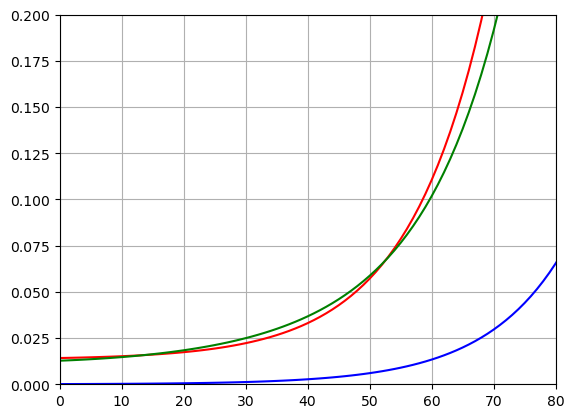

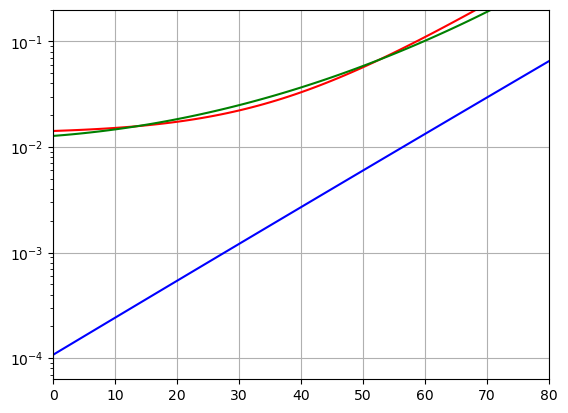

In [5]:
import math
import numpy as np
import scipy
import scipy.optimize
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


def qx(age):
    a=-9.13275
    b= 8.09432e-2
    c= -1.1018e-5
    return(math.exp(a+(b+c*age)*age))

def qx2(age, myp):
    a=myp[0]
    b=myp[1]
    c=myp[2]
    return(math.exp(a+(b+c*age)*age))


def t1px(age, a, b):
    tpx = 1
    for i in range(age-1):
        qxL = max(0., min(1.,(a * qx(i) + b)))
        tpx *= (1. - qxL)
    qxL = max(0., min(1.,(a * qx(age)+b)))
    return(max(0.000001,tpx * qxL))
 
def t1px2(age, myp):
    tpx = 1
    for i in range(age-1):
        qxL = max(0.000001, min(1.,qx2(i,myp)))
        tpx *= (1. - qxL)
    qxL = max(0.000001, min(1.,qx2(age,myp)))
    return(max(0.0000001,tpx * qxL))
    
        
def ex(age, a, b):
    px = 1
    ex = 0.5
    for i in range(100):
        qxL = max(1., min(0.,(a * qx(age)+b)))
        px *= (1. - qxL)
        ex += px
    return(ex)

def MyTarget (a):
    AgesReached = [47, 67, 48, 38, 45, 48, 51, 76, 32, 43, 42, 26, 25, 40, 53, 64, 49, 42]
    AgesReached.append(1)
    AgesReached.append(1)
    AgesReached.append(6)
    AgesReached.append(9)
    AgesReached.append(12)
    AgesReached.append(15)
    AgesReached.append(18)    
    Err = 0
# -    MySize = 1./len(AgesReached)
    for i in AgesReached:
#  Err += (MySize - t1px(i,a[0],a[1]))**2
        Err -= math.log(t1px(i,a[0],a[1]))        
    return(Err)

def MyTarget2 (a):
    AgesReached = [47, 67, 48, 38, 45, 48, 51, 76, 32, 43, 42, 26, 25, 40, 53, 64, 49, 42]
    AgesReached.append(1)
    AgesReached.append(1)
    AgesReached.append(6)
    AgesReached.append(9)
    AgesReached.append(12)
    AgesReached.append(15)
    AgesReached.append(18)    
    Err = 0
# -    MySize = 1./len(AgesReached)
    for i in AgesReached:
# -        Err += (MySize - t1px(i,a[0],a[1]))**2
        Err -= math.log(t1px2(i,a))        
    return(Err)

x0 = [1.1, 0.04]
qxp = [-9.13275,8.09432e-2,  -1.1018e-5]
c = scipy.optimize.fmin(MyTarget, x0, args=(), xtol=0.0001, ftol=0.0001, full_output = True)
print(c)
d = scipy.optimize.fmin(MyTarget2, qxp, args=(), xtol=0.0001, ftol=0.0001, full_output = True)
print(d)
a = c[0][0]
b = c[0][1]
print(a, b)
qx1 = []
qx2x = []
qx3 = []
Ages = range(110)

for i in Ages:
    qxLoc = qx(i)
    qx1.append(qxLoc)
    qxL = max(0., min(1.,(a * qx(i)+b)))
    qx2x.append(qxL)
    qxL = qx2(i, d[0])
    qx3.append(qxL)
    
plt.figure(1)
plt.plot(Ages, qx1,"b", Ages, qx2x,"r", Ages, qx3,"g")
plt.grid(True)
plt.axis([0,80,0, 0.20])

plt.figure(2)
plt.semilogy(Ages, qx1,"b", Ages, qx2x,"r", Ages, qx3,"g")
plt.grid(True)
plt.axis([0,80,0, 0.20])

l1 = np.zeros(120)
l2 = np.zeros(120)
l3 = np.zeros(120)

for i in range(105,-1,-1):
    l1[i] = l1[i+1]*(1-qx1[i]) + 1
    l2[i] = l2[i+1]*(1-qx2x[i]) + 1
    l3[i] = l3[i+1]*(1-qx3[i]) + 1

for i in range(105,-1,-1):
    l1[i] -= 0.5
    l2[i] -= 0.5
    l3[i] -= 0.5
    

**MLE**

You are given a RV $(T_i)_{i=1,...n} \sim F(\vec{a})$ iid, and observed $t_1, \dots t_n$ Estimate $\vec{a}$.

You consider the likey hood

\begin{eqnarray}
P[ T_1 = t_1, \dots T_n= t_n] & = & \prod_{k=1}^n P[T_k= t_k] \\
  & = & maximal
\end{eqnarray}

equivalent 

\begin{eqnarray}
\log(P[ T_1 = t_1, \dots T_n= t_n]) & = & \sum_{k=1}^n \log(P[T_k= t_k]) \\
  & = & maximal
\end{eqnarray}

\begin{eqnarray}
P[T_k= t_k] & = & {}_{1 | t_k}p_0 \\
            & = & p_o \, p_1 \dots p_{t_k-1} q_{t_k}
\end{eqnarray}

In [7]:

for i in range(0,81,10):
   print("%3d: %6.1f %6.1f %6.1f %6.3f"%(i, l1[i], l2[i], l3[i], l2[i]/l1[i]))

  0:   75.6   36.1   35.8  0.478
 10:   65.7   31.1   30.3  0.473
 20:   55.9   25.6   24.8  0.458
 30:   46.3   20.1   19.5  0.433
 40:   37.1   14.6   14.5  0.395
 50:   28.3    9.8   10.2  0.346
 60:   20.5    5.9    6.5  0.289
 70:   13.7    3.1    3.8  0.229
 80:    8.4    1.4    1.8  0.168
